In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, accuracy_score, average_precision_score
from sklearn.preprocessing import StandardScaler
pd.pandas.set_option('display.max_columns',None)

Notebook Colors:


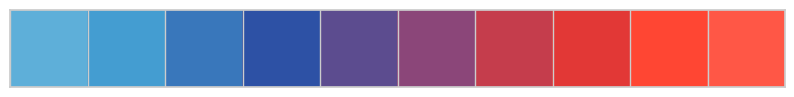

In [ ]:
class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m'
    
    
my_colors = ["#5EAFD9", "#449DD1", "#3977BB", 
             "#2D51A5", "#5C4C8F", "#8B4679",
             "#C53D4C", "#E23836", "#FF4633", "#FF5746"]

print(clr.S+"Notebook Colors:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

In [ ]:
df_train=pd.read_csv('Training50.csv')
df_train.head()

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,497,1,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1
1,756,0,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1
2,580,0,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1
3,833,0,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1
4,602,1,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1


In [ ]:
df_test=pd.read_csv('Test50.csv')
df_test.head()

,Unnamed: 0,Creditability,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker
0,2,1,1,9,3,4,2799,1,2,2,2,1,2,1,36,2,1,2,1,2,1,1
1,4,1,1,12,3,4,2122,1,2,3,2,1,2,1,39,2,1,2,1,2,1,2
2,10,1,2,24,2,3,3758,3,1,1,1,1,4,4,23,2,1,1,1,1,1,1
3,11,1,1,11,3,4,3905,1,2,2,2,1,2,1,36,2,1,2,1,2,1,1
4,13,1,1,6,3,3,1957,1,3,1,1,1,4,3,31,2,2,1,1,1,1,1


In [ ]:
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availabl

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      500 non-null    int64
 1   Account.Balance                    500 non-null    int64
 2   Duration.of.Credit..month.         500 non-null    int64
 3   Payment.Status.of.Previous.Credit  500 non-null    int64
 4   Purpose                            500 non-null    int64
 5   Credit.Amount                      500 non-null    int64
 6   Value.Savings.Stocks               500 non-null    int64
 7   Length.of.current.employment       500 non-null    int64
 8   Instalment.per.cent                500 non-null    int64
 9   Sex...Marital.Status               500 non-null    int64
 10  Guarantors                         500 non-null    int64
 11  Duration.in.Current.address        500 non-null    int64
 12  Most.valuable.availabl

In [ ]:
columns=[f for f in df_train.columns]
def unique_values(df,name):
  print(clr.S+f'===== {name} data====='+clr.E)
  for col in columns:
    values=np.unique(df_train[col])
    if len(values)<10:
      print(f'{col}: {values}')


In [ ]:
unique_values(df_train,'Train')

===== Train data=====
Creditability: [0 1]
Account.Balance: [1 2 3]
Payment.Status.of.Previous.Credit: [1 2 3]
Purpose: [1 2 3 4]
Value.Savings.Stocks: [1 2 3 4]
Length.of.current.employment: [1 2 3 4]
Instalment.per.cent: [1 2 3 4]
Sex...Marital.Status: [1 2 3]
Guarantors: [1 2]
Duration.in.Current.address: [1 2 3 4]
Most.valuable.available.asset: [1 2 3 4]
Concurrent.Credits: [1 2]
Type.of.apartment: [1 2 3]
No.of.Credits.at.this.Bank: [1 2]
Occupation: [1]
No.of.dependents: [1 2]
Telephone: [1 2]
Foreign.Worker: [1 2]


In [ ]:
unique_values(df_test,'Test')

===== Test data=====
Creditability: [0 1]
Account.Balance: [1 2 3]
Payment.Status.of.Previous.Credit: [1 2 3]
Purpose: [1 2 3 4]
Value.Savings.Stocks: [1 2 3 4]
Length.of.current.employment: [1 2 3 4]
Instalment.per.cent: [1 2 3 4]
Sex...Marital.Status: [1 2 3]
Guarantors: [1 2]
Duration.in.Current.address: [1 2 3 4]
Most.valuable.available.asset: [1 2 3 4]
Concurrent.Credits: [1 2]
Type.of.apartment: [1 2 3]
No.of.Credits.at.this.Bank: [1 2]
Occupation: [1]
No.of.dependents: [1 2]
Telephone: [1 2]
Foreign.Worker: [1 2]


In [ ]:
def get_csv_info(df, name):
    print(clr.S+f" ====== {name} ======="+clr.E)
    print(clr.S+f"No of Nan Values in {name}.csv data: "+clr.E,df.isnull().sum().sum())
    print("\n")
    print(clr.S+f'Shape:'+clr.E,df.shape)
    print("\n")
    print(clr.S+"Features: "+clr.E, df.columns)
    print("\n\n")


In [ ]:
get_csv_info(df_train,'Train')

 ====== Train =======
No of Nan Values in Train.csv data:  0


Shape: (500, 21)


Features:  Index(['Creditability', 'Account.Balance', 'Duration.of.Credit..month.',
       'Payment.Status.of.Previous.Credit', 'Purpose', 'Credit.Amount',
       'Value.Savings.Stocks', 'Length.of.current.employment',
       'Instalment.per.cent', 'Sex...Marital.Status', 'Guarantors',
       'Duration.in.Current.address', 'Most.valuable.available.asset',
       'Age..years.', 'Concurrent.Credits', 'Type.of.apartment',
       'No.of.Credits.at.this.Bank', 'Occupation', 'No.of.dependents',
       'Telephone', 'Foreign.Worker'],
      dtype='object')





In [ ]:
get_csv_info(df_test,'Test')

 ====== Test =======
No of Nan Values in Test.csv data:  0


Shape: (500, 21)


Features:  Index(['Creditability', 'Account.Balance', 'Duration.of.Credit..month.',
       'Payment.Status.of.Previous.Credit', 'Purpose', 'Credit.Amount',
       'Value.Savings.Stocks', 'Length.of.current.employment',
       'Instalment.per.cent', 'Sex...Marital.Status', 'Guarantors',
       'Duration.in.Current.address', 'Most.valuable.available.asset',
       'Age..years.', 'Concurrent.Credits', 'Type.of.apartment',
       'No.of.Credits.at.this.Bank', 'Occupation', 'No.of.dependents',
       'Telephone', 'Foreign.Worker'],
      dtype='object')





In [ ]:
def label_ratio(df,name,color):
  print(clr.S+f"======= {name} data======="+clr.E)
  result=df['Creditability'].value_counts(normalize=True)

  plt.figure(figsize=(13,5))
  plt.subplot(1,2,1)
  plt.title('Checking the percentage of Creditability (label)')

  result.plot(kind='pie',wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' },
              colors=[color[0],color[1]], autopct="%.0f%%",explode = (0.05, 0.05))

  plt.subplot(1,2,2)
  ax = result.plot(kind='bar',figsize=(15,4),width = 0.8,color=[color[0],color[1]],edgecolor=None)
  plt.xticks(fontsize=14)
  plt.title('Checking creditability ratio')

# EDA

**Interpretation ✍**:
We can see in piechart and barchart below, creditability for 1 has the highest ratio then that of creditability 0. Class 0 has very few examples in the data, it means our data is imbalanced we have to balance our data.

======= Train data=======


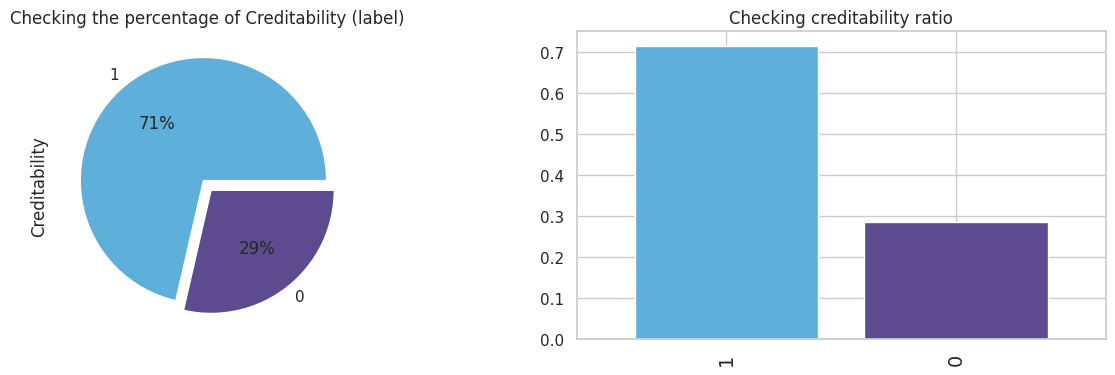

In [ ]:
label_ratio(df_train,'Train',[my_colors[0],my_colors[4]])

======= Test data=======


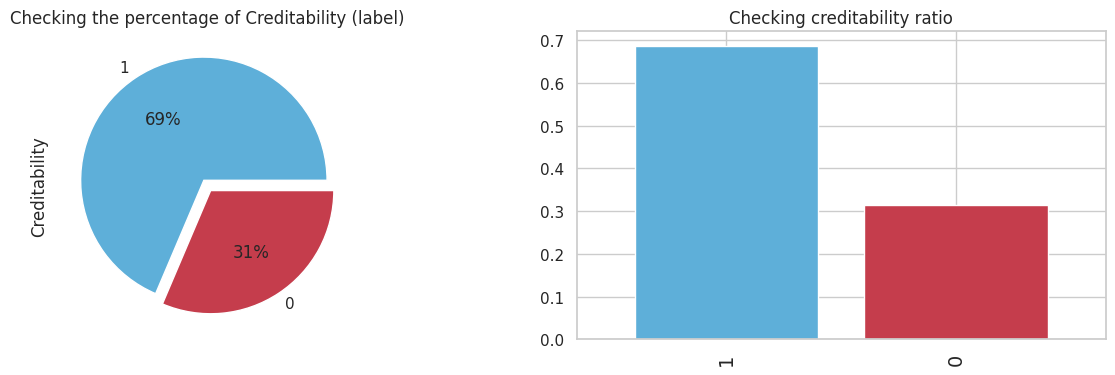

In [ ]:
label_ratio(df_test,'Test',[my_colors[0],my_colors[6]])

**Interpretation ✍**: Below graph shows that value 2 of 'Concurrent.Credits' has a higher count for 'Creditability' value 1, it means that borrowers with 2 concurrent credits are more likely to be classified as creditworthy i.e., 'Creditability' value 1 compared to those with only one concurrent credit.

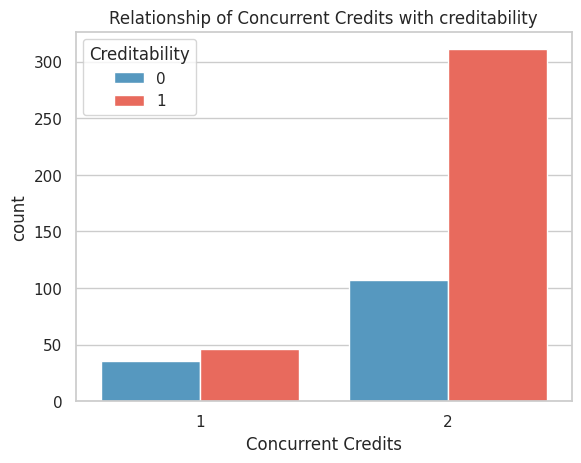

In [ ]:
sns.countplot(data=df_train,x='Concurrent.Credits',hue='Creditability', palette=[my_colors[1],my_colors[9]])
plt.xlabel('Concurrent Credits')
plt.ylabel('count')
plt.title('Relationship of Concurrent Credits with creditability')
plt.show()

**Interpretation ✍**: Below graph shows that Borrowers with higher instalment value are more likely to have good creditworthiness.

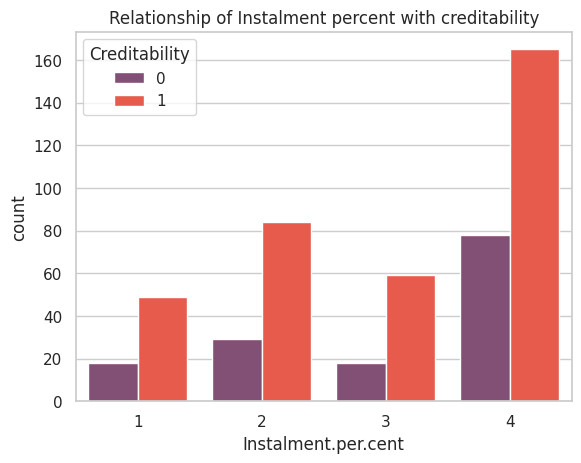

In [ ]:
sns.countplot(data=df_train,x='Instalment.per.cent',hue='Creditability',palette=[my_colors[5],my_colors[8]])
plt.xlabel('Instalment.per.cent')
plt.ylabel('count')
plt.title('Relationship of Instalment percent with creditability')
plt.show()

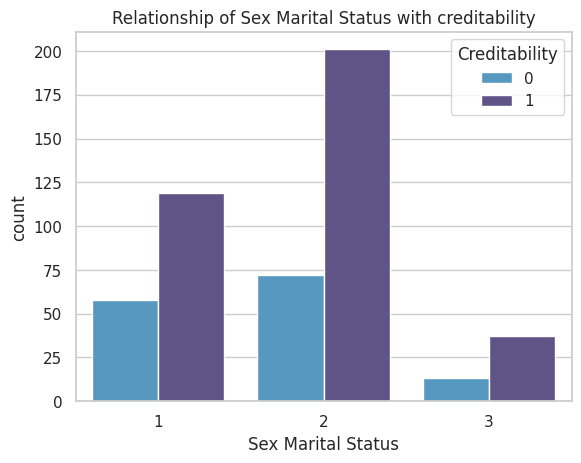

In [ ]:
sns.countplot(data=df_train,x='Sex...Marital.Status',hue='Creditability',palette=[my_colors[1],my_colors[4]])
plt.xlabel('Sex Marital Status')
plt.ylabel('count')
plt.title('Relationship of Sex Marital Status with creditability')
plt.show()

In [ ]:
np.unique(df_train['Account.Balance'])

array([1, 2, 3])

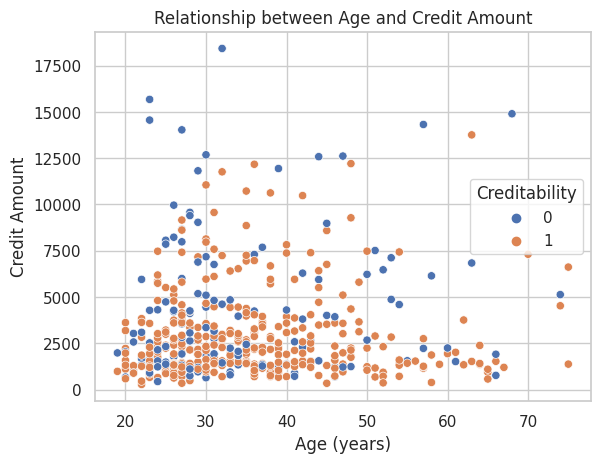

In [ ]:
sns.scatterplot(data=df_train, x="Age..years.", y="Credit.Amount", hue="Creditability")
plt.xlabel("Age (years)")
plt.ylabel("Credit Amount")
plt.title("Relationship between Age and Credit Amount")
plt.show()

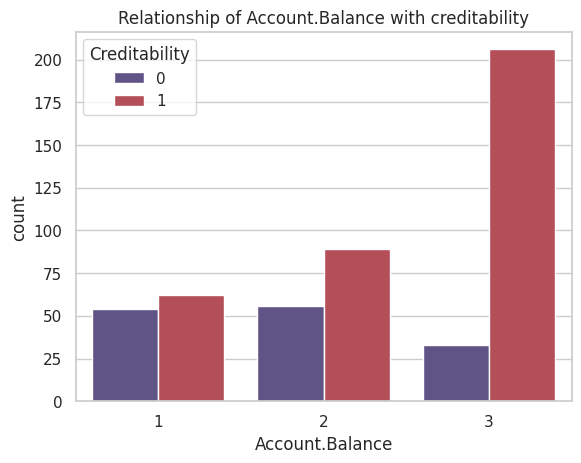

In [ ]:
sns.countplot(data=df_train,x='Account.Balance',hue='Creditability', palette=[my_colors[4],my_colors[6]])
plt.xlabel('Account.Balance')
plt.ylabel('count')
plt.title('Relationship of Account.Balance with creditability')
plt.show()

**Interpretation ✍**: Below graph shows that Borrowers with value 1 of No of Credits at this Bank are more likely to have good creditworthiness.

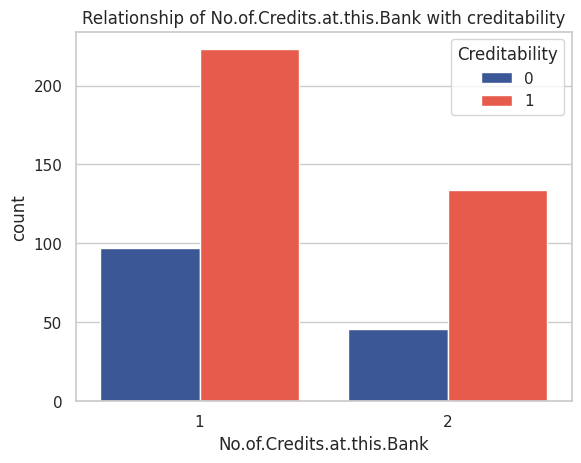

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(data=df_train,x='No.of.Credits.at.this.Bank',hue='Creditability', palette=[my_colors[3],my_colors[8]])
plt.xlabel('No.of.Credits.at.this.Bank')
plt.ylabel('count')
plt.title('Relationship of No.of.Credits.at.this.Bank with creditability')
plt.show()

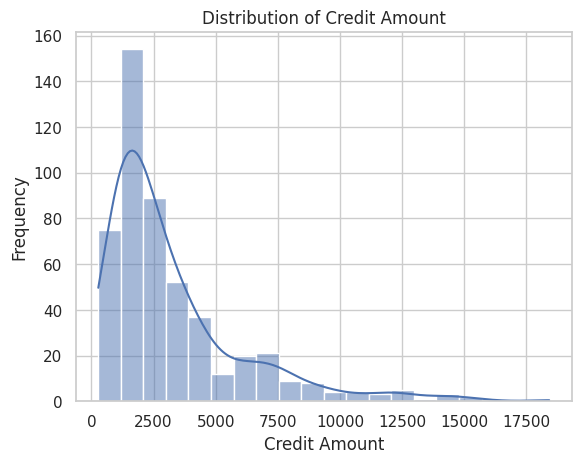

In [ ]:
sns.histplot(data=df_train, x="Credit.Amount", bins=20, kde=True)
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")
plt.title("Distribution of Credit Amount")
plt.show()

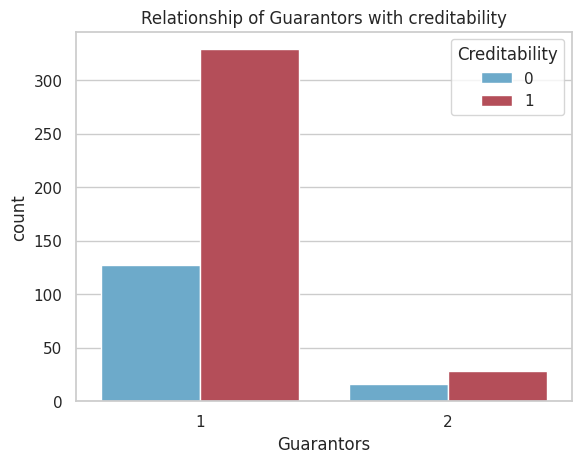

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(data=df_train,x='Guarantors',hue='Creditability', palette=[my_colors[0],my_colors[6]])
plt.xlabel('Guarantors')
plt.ylabel('count')
plt.title('Relationship of Guarantors with creditability')
plt.show()

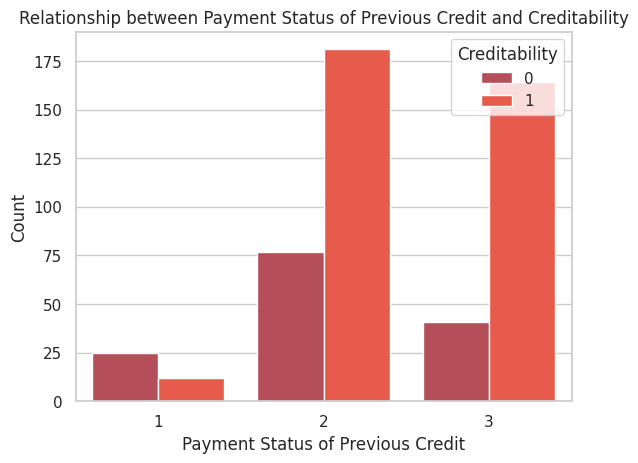

In [ ]:
sns.countplot(data=df_train, 
              x='Payment.Status.of.Previous.Credit', 
              hue='Creditability', 
              palette=[my_colors[6],my_colors[8]])
plt.xlabel("Payment Status of Previous Credit")
plt.ylabel("Count")
plt.title("Relationship between Payment Status of Previous Credit and Creditability")
plt.legend(title='Creditability', loc='upper right')
plt.show()

In [ ]:
np.unique(df_test['Account.Balance'])

array([1, 2, 3])

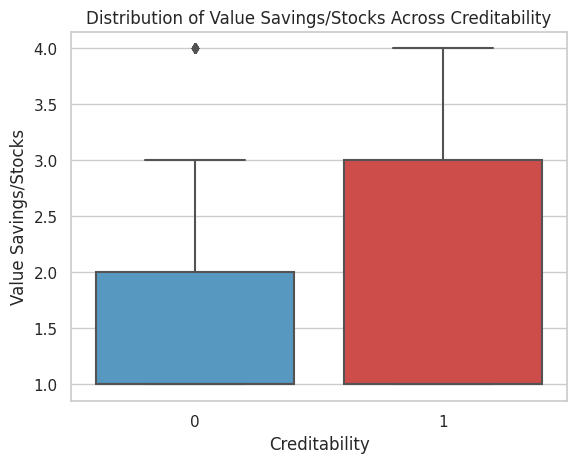

In [ ]:
sns.boxplot(data=df_train, x='Creditability', y='Value.Savings.Stocks', palette=[my_colors[1],my_colors[7]])
plt.xlabel("Creditability")
plt.ylabel("Value Savings/Stocks")
plt.title("Distribution of Value Savings/Stocks Across Creditability")
plt.show()

**Interpretation ✍**: The stacked bar chart shows the proportion of creditability for each purpose of the loan. This can help us identify whether there is a relationship between purpose and creditability. We can see purpose 1 has the highest ratio for creditability 1 whereas purpose 4 has the highest credibility 0.

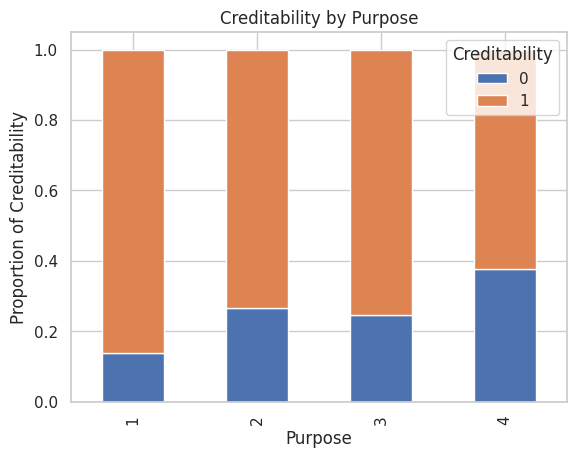

In [ ]:
purpose_xtab = pd.crosstab(df_train['Purpose'], df_train['Creditability'], normalize='index')
purpose_xtab.plot(kind='bar', stacked=True)
plt.xlabel("Purpose")
plt.ylabel("Proportion of Creditability")
plt.title("Creditability by Purpose")
plt.show()

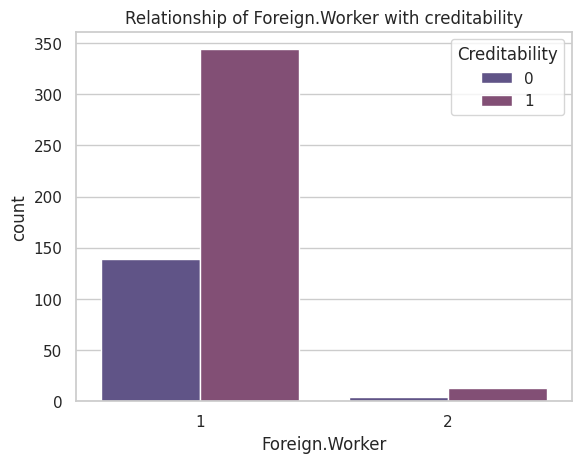

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(data=df_train,x='Foreign.Worker',hue='Creditability', palette=[my_colors[4],my_colors[5]])
plt.xlabel('Foreign.Worker')
plt.ylabel('count')
plt.title('Relationship of Foreign.Worker with creditability')
plt.show()

# Feature Engineering and Preprocessing

In [ ]:
X=df_train.drop('Creditability',axis=1)
y=df_train['Creditability']

In [ ]:
rs = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rs.fit_resample(X, y)

In [ ]:
X_resampled['Creditability']=y_resampled
X_resampled.head()

,Account.Balance,Duration.of.Credit..month.,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Value.Savings.Stocks,Length.of.current.employment,Instalment.per.cent,Sex...Marital.Status,Guarantors,Duration.in.Current.address,Most.valuable.available.asset,Age..years.,Concurrent.Credits,Type.of.apartment,No.of.Credits.at.this.Bank,Occupation,No.of.dependents,Telephone,Foreign.Worker,Creditability
0,3,6,2,3,2108,1,3,2,3,1,2,1,29,2,1,1,1,1,1,1,1
1,1,15,1,4,950,1,4,4,2,1,3,3,33,2,1,2,1,2,1,1,0
2,1,42,2,3,7174,4,3,4,1,1,3,3,30,2,2,1,1,1,2,1,0
3,3,36,3,4,7980,4,1,4,2,1,4,3,27,2,1,2,1,1,2,1,0
4,3,24,3,2,2028,1,3,2,2,1,2,2,30,2,2,2,1,1,1,1,1


======= Train data=======


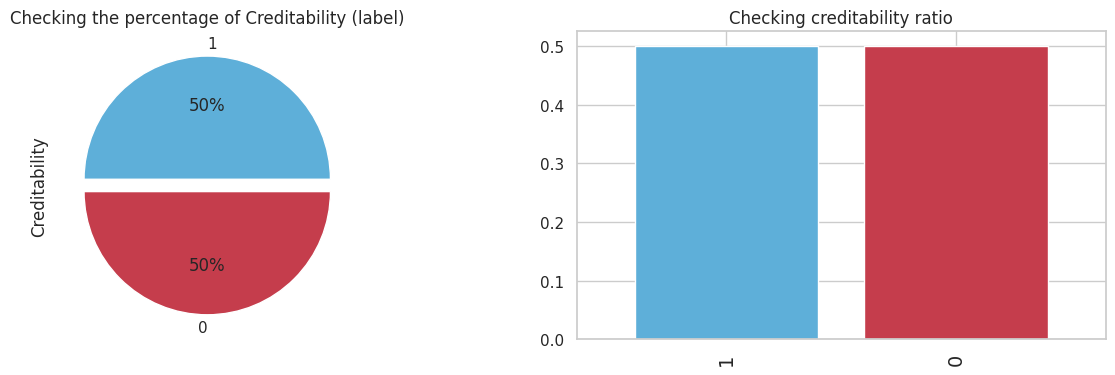

In [ ]:
label_ratio(X_resampled,'Train',[my_colors[0],my_colors[6]])

<Axes: >

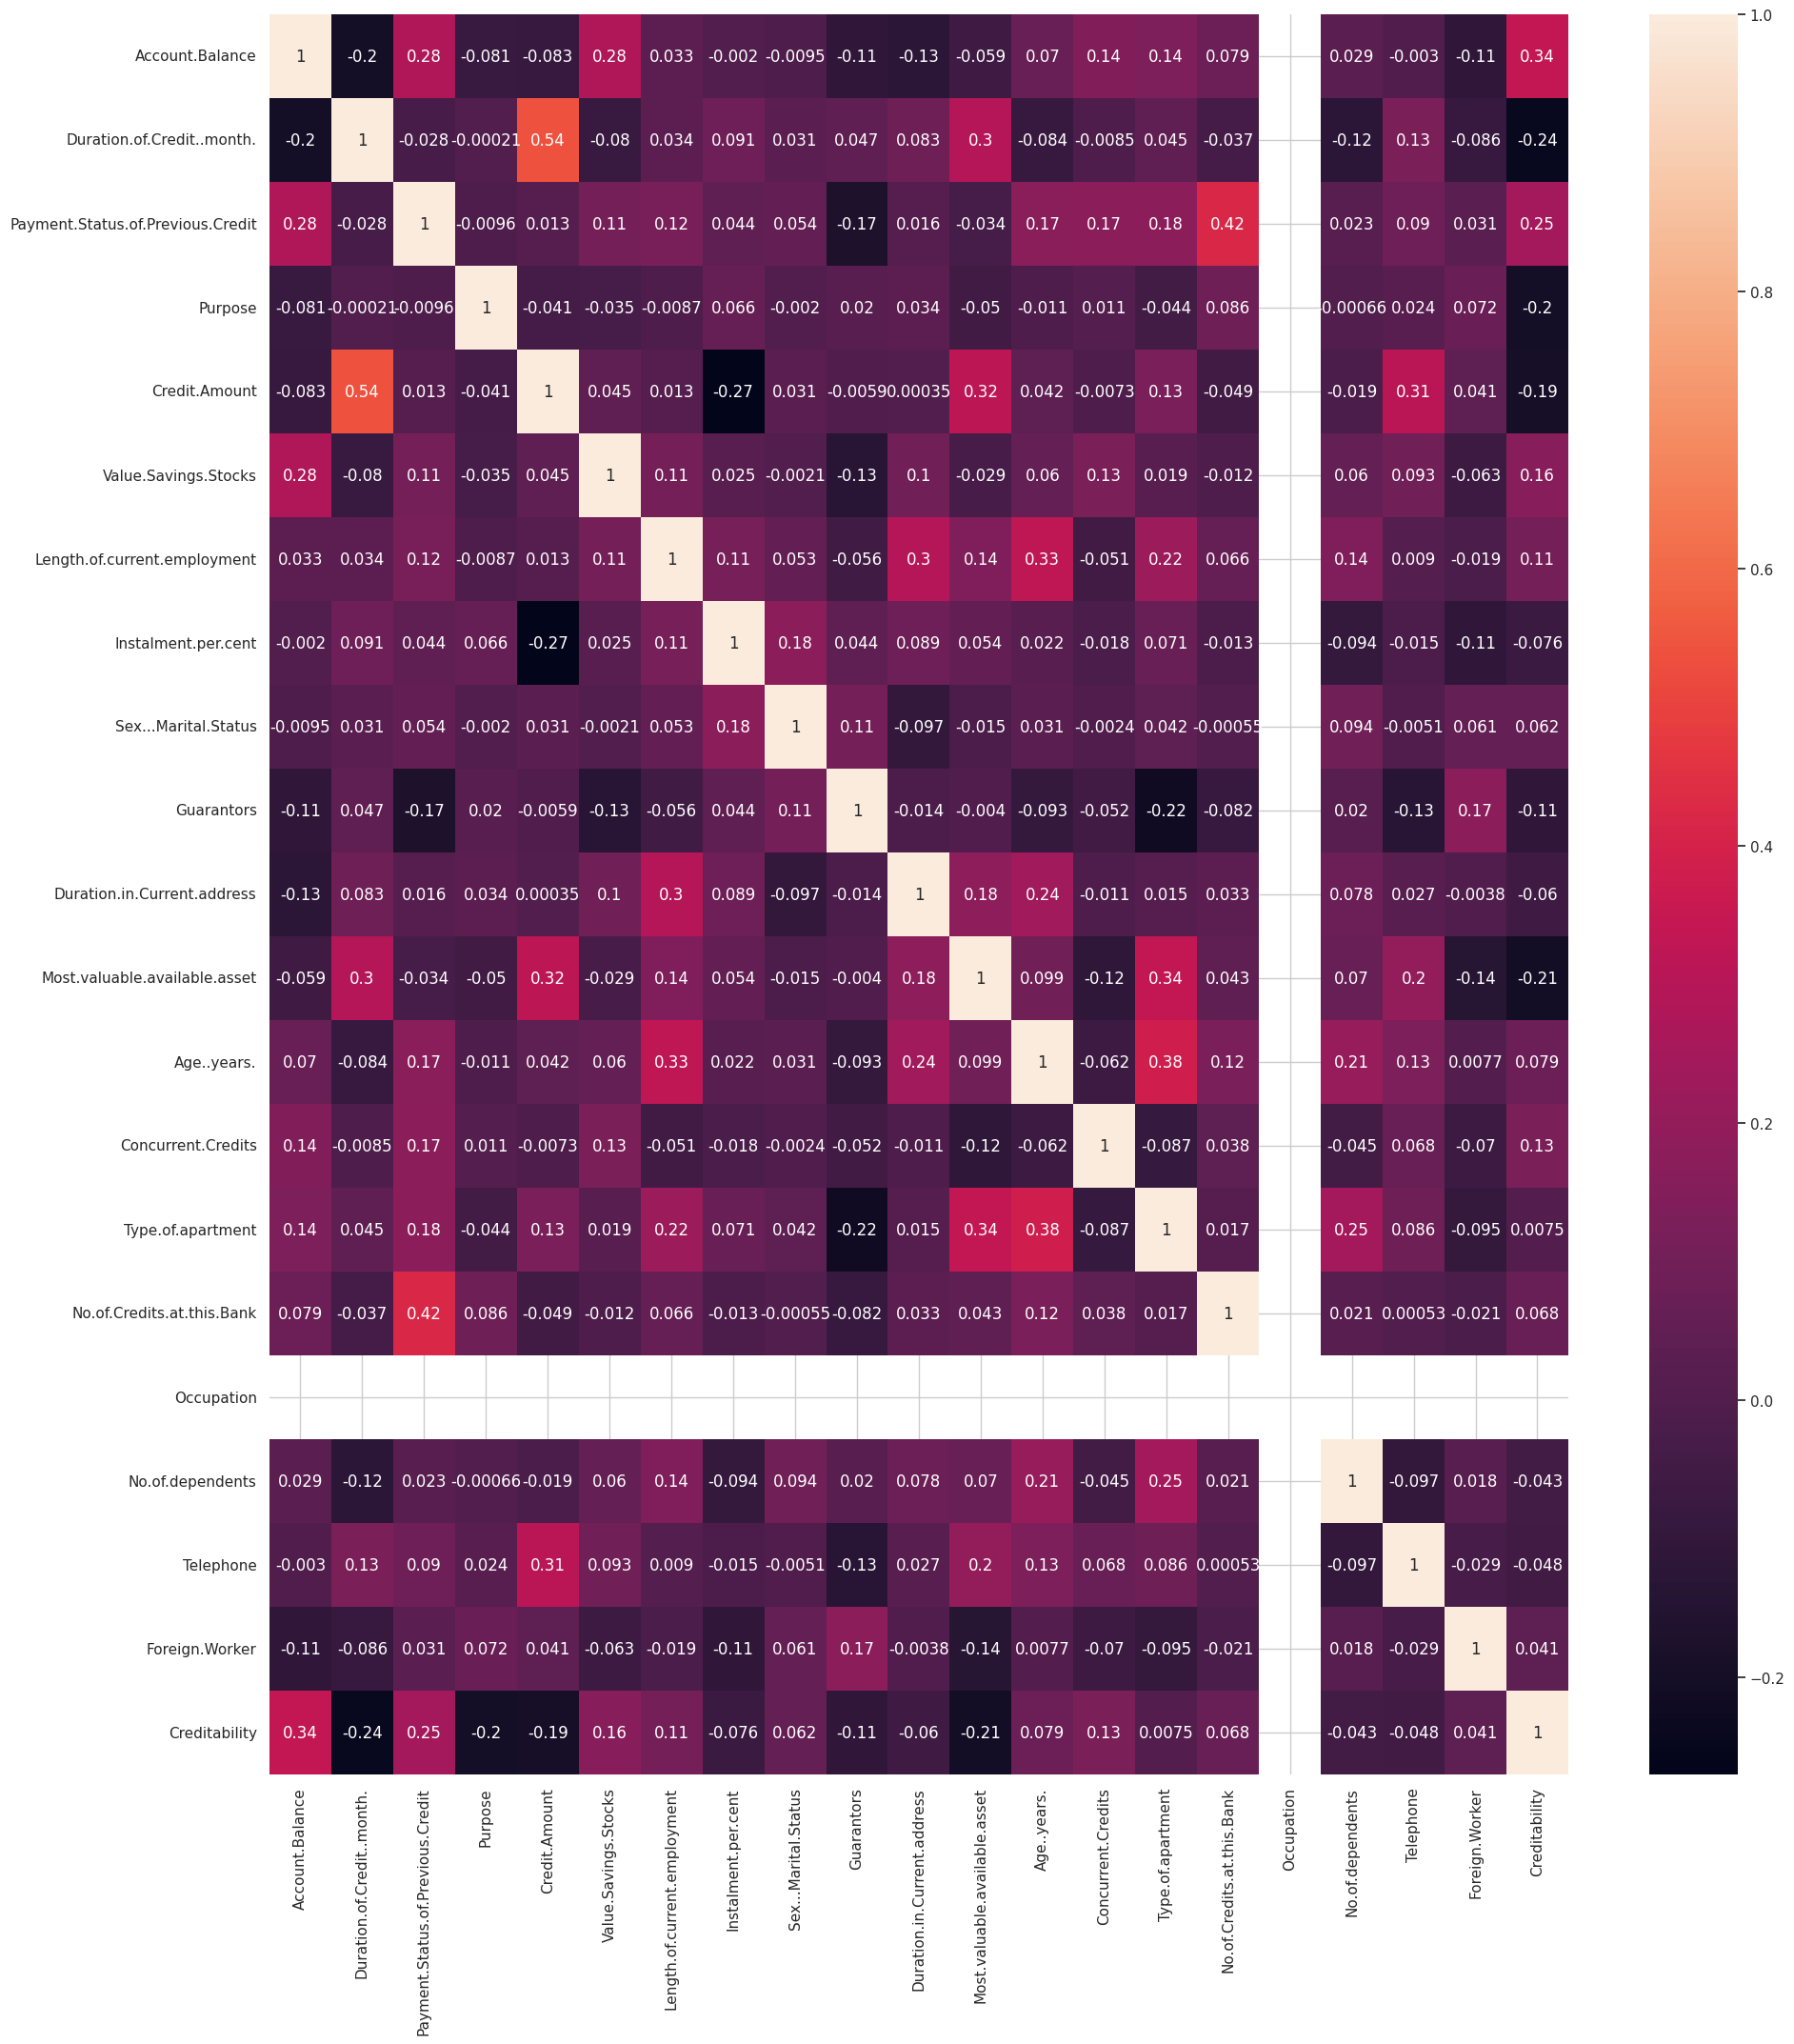

In [ ]:
plt.figure(figsize=(22,24))
sns.heatmap(X_resampled.corr(), annot=True)

In [ ]:
cols_to_drop=['Duration.of.Credit..month.','Telephone','Length.of.current.employment','Duration.in.Current.address',
              'Foreign.Worker','Occupation','No.of.dependents','Type.of.apartment','No.of.Credits.at.this.Bank']

In [ ]:
X_train=X_resampled.drop(cols_to_drop,axis=1)

In [ ]:
y_train=X_train.Creditability
x_train=X_train.drop('Creditability',axis=1)

In [ ]:
x_test=df_test.drop(cols_to_drop,axis=1)
y_test=df_test.Creditability

In [ ]:
x_test=x_test.drop('Creditability',axis=1)

In [ ]:
x_train['Total asset']=x_train['Value.Savings.Stocks'] + x_train['Most.valuable.available.asset']
x_train.drop(['Most.valuable.available.asset','Value.Savings.Stocks'],axis=1)

x_test['Total asset']=x_test['Value.Savings.Stocks'] + x_test['Most.valuable.available.asset']
x_test.drop(['Most.valuable.available.asset','Value.Savings.Stocks'],axis=1)

,Account.Balance,Payment.Status.of.Previous.Credit,Purpose,Credit.Amount,Instalment.per.cent,Sex...Marital.Status,Guarantors,Age..years.,Concurrent.Credits,Total asset
0,1,3,4,2799,2,2,1,36,2,2
1,1,3,4,2122,3,2,1,39,2,2
2,2,2,3,3758,1,1,1,23,2,7
3,1,3,4,3905,2,2,1,36,2,2
4,1,3,3,1957,1,1,1,31,2,4
...,...,...,...,...,...,...,...,...,...,...
495,1,3,4,3966,1,1,1,33,1,2
496,1,1,3,6199,4,2,1,28,2,3
497,1,2,3,1987,2,2,1,21,2,2
498,1,2,4,2303,4,2,2,45,2,2


In [ ]:
X_resampled.columns

Index(['Account.Balance', 'Duration.of.Credit..month.',
       'Payment.Status.of.Previous.Credit', 'Purpose', 'Credit.Amount',
       'Value.Savings.Stocks', 'Length.of.current.employment',
       'Instalment.per.cent', 'Sex...Marital.Status', 'Guarantors',
       'Duration.in.Current.address', 'Most.valuable.available.asset',
       'Age..years.', 'Concurrent.Credits', 'Type.of.apartment',
       'No.of.Credits.at.this.Bank', 'Occupation', 'No.of.dependents',
       'Telephone', 'Foreign.Worker', 'Creditability'],
      dtype='object')

In [ ]:
ss=StandardScaler()
x_train['Credit.Amount']=ss.fit_transform(x_train[['Credit.Amount']])
x_test['Credit.Amount']=ss.fit_transform(x_test[['Credit.Amount']])

# Modeling

In [ ]:
clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3,grow_policy='depthwise',
              importance_type=None,
              learning_rate=0.05, max_bin=25, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15,n_estimators=100,
              verbosity=1)
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.3, gpu_id=None,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=25,
              max_cat_threshold=None, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=15, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
predxgb=clf.predict(x_test)
print(f'Xgb testing accuracy: {accuracy_score(y_test,predxgb)}')
print(f'Xgb training accuracy: {clf.score(x_train,y_train)}')

Xgb testing accuracy: 0.716
Xgb training accuracy: 0.9943977591036415


In [ ]:
rf=RandomForestClassifier(n_estimators=600, max_depth=15,min_samples_split=20, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_split=20, n_estimators=600,
                       random_state=42)

In [ ]:
predrf=rf.predict(x_test)
print(f'RandomForest testing accuracy: {accuracy_score(y_test,predrf)}')
print(f'RandomForest training accuracy: {rf.score(x_train,y_train)}')

RandomForest testing accuracy: 0.722
RandomForest training accuracy: 0.9047619047619048


In [ ]:
gd=GradientBoostingClassifier(learning_rate=0.03,n_estimators=450,max_depth=9,min_samples_split=8)
gd.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.03, max_depth=9, min_samples_split=8,
                           n_estimators=450)

In [ ]:
predgb=gd.predict(x_test)
print(f'GradientBoosting testing accuracy: {accuracy_score(y_test,predgb)}')
print(f'GradientBoosting training accuracy: {gd.score(x_train,y_train)}')

GradientBoosting testing accuracy: 0.704
GradientBoosting training accuracy: 1.0


In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predlr=lr.predict(x_test)
print(f'Logistic Regression testing accuracy: {accuracy_score(y_test,predlr)}')
print(f'Logistic Regression training accuracy: {lr.score(x_train,y_train)}')

Logistic Regression testing accuracy: 0.686
Logistic Regression training accuracy: 0.7296918767507002


In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
preddt=dt.predict(x_test)
print(f'Decision Tree testing accuracy: {accuracy_score(y_test,preddt)}')
print(f'Decision Tree training accuracy: {dt.score(x_train,y_train)}')

Decision Tree testing accuracy: 0.666
Decision Tree training accuracy: 1.0


In [ ]:
predictions=[predxgb,predrf,predgb,predlr,preddt]

for pred in predictions:
  print(f1_score(y_test,pred))

0.7971428571428572
0.7890743550834598
0.7909604519774011
0.740495867768595
0.7488721804511278
